In [40]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel 
# pingouin fastapi pydantic streamlit uvicorn requests numpy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [42]:
# Inspecionar a estrutura do dataframe
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [43]:
# Copiar o DF para o DF EDA
df_salario_eda = df_salario.copy()

In [44]:
# Copiar o DF para o DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [45]:
# Visualizar os dados
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [46]:
# detectar valores ausents
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [47]:
# Medidas Estatísticas do DF
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

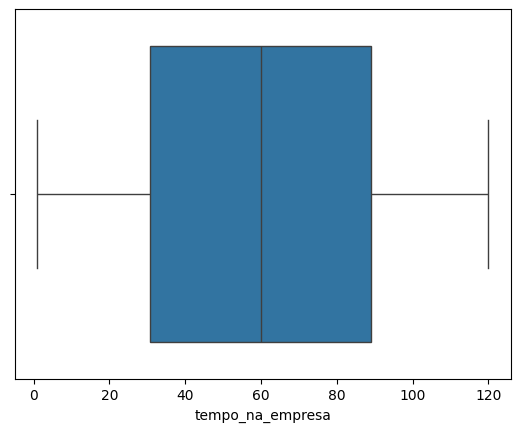

In [48]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

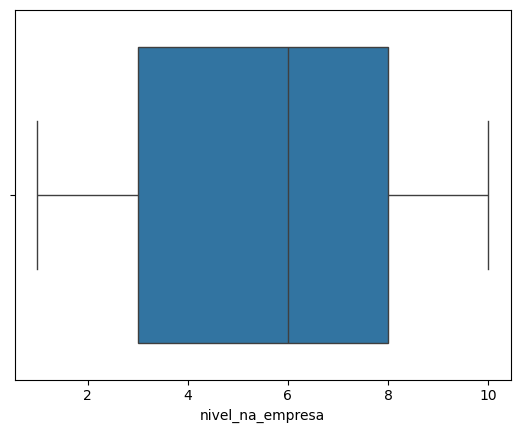

In [49]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

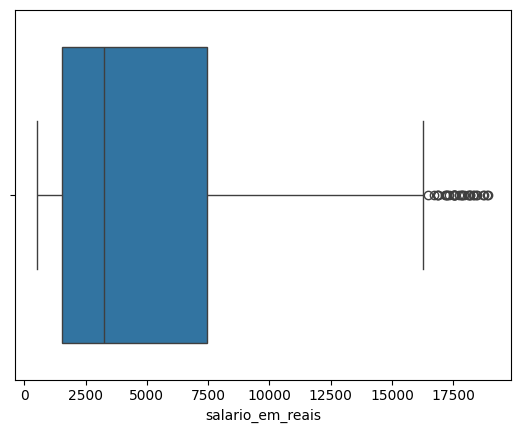

In [50]:
# Detectar outliers
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

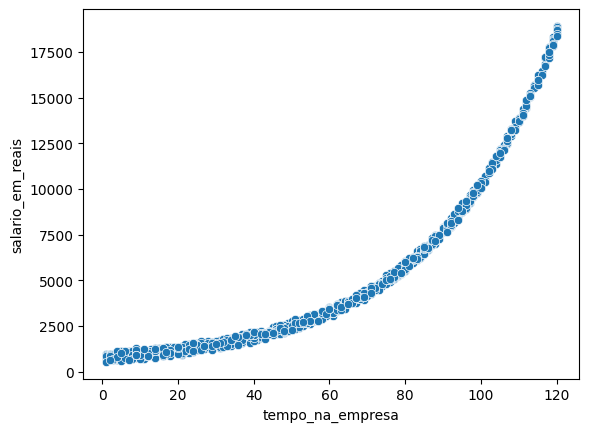

In [51]:
# Cruzamento das variaveis numericas com salarioem reais (variavel target)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

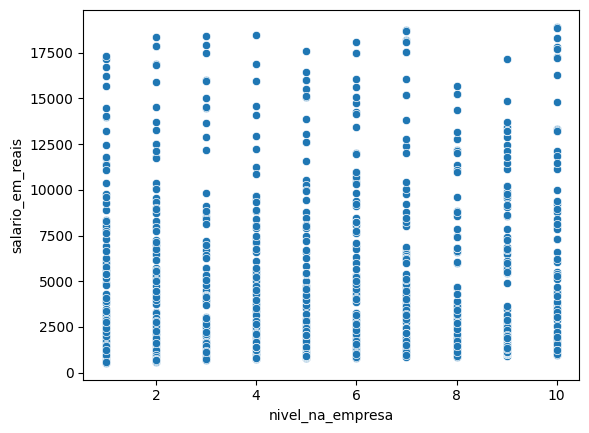

In [52]:
# Cruzamento das variaveis numericas com salarioem reais (variavel target)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

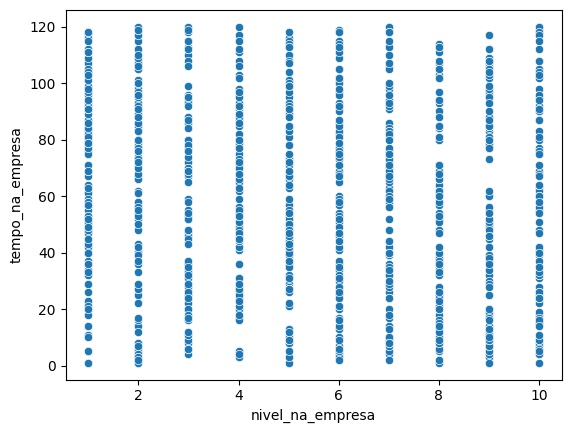

In [53]:

sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

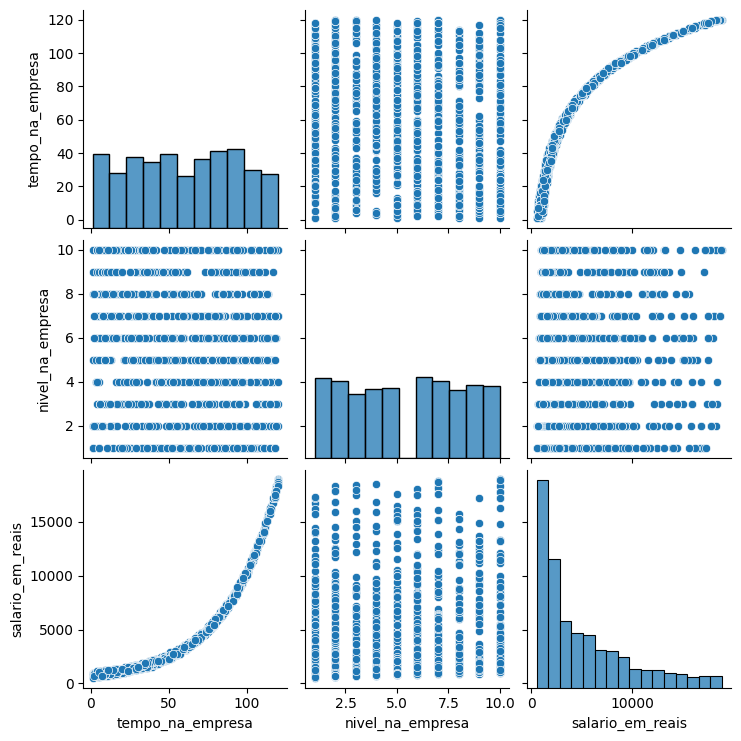

In [54]:
# Histogramas das variáveis
sns.pairplot(df_salario_eda)

<Axes: >

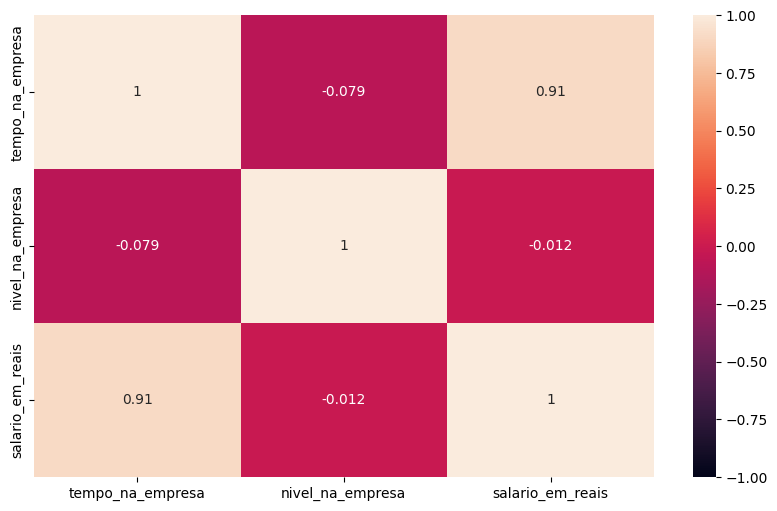

In [55]:
# Mapa de Calor
# Correlação de Pearson por padrão
plt.figure(figsize=(10, 6))
sns.heatmap(df_salario_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

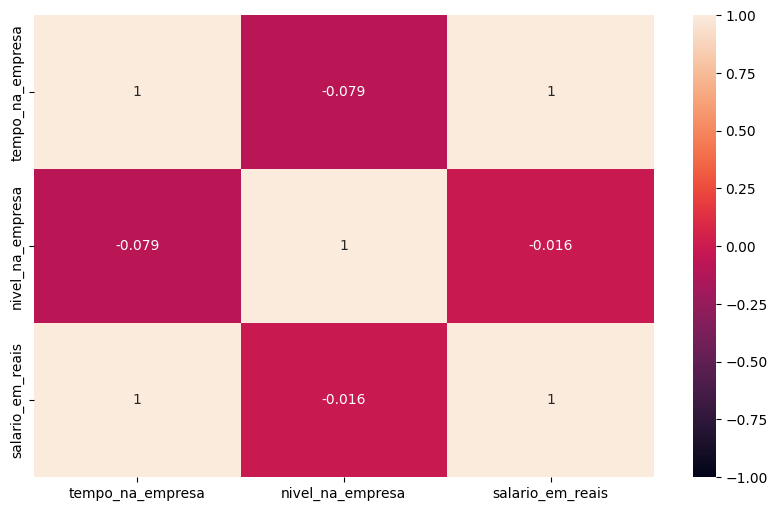

In [56]:
# Mapa de Calor
# Correlação de Pearson por padrão
plt.figure(figsize=(10, 6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

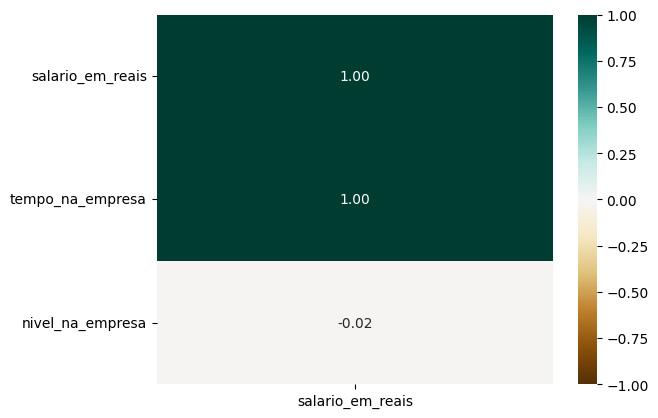

In [57]:
# formato de ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']]
   .sort_values(by='salario_em_reais', ascending=False), 
    vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')

In [58]:
# Bucketing Tempo de Casa
bins_tempo_casa = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', 
                     '60-69', '70-79', '80-89', '90-99', '100-109', '110-119',
                       '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'],
                                              bins=bins_tempo_casa,
                                              labels=labels_tempo_casa,
                                              include_lowest=True)

In [59]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

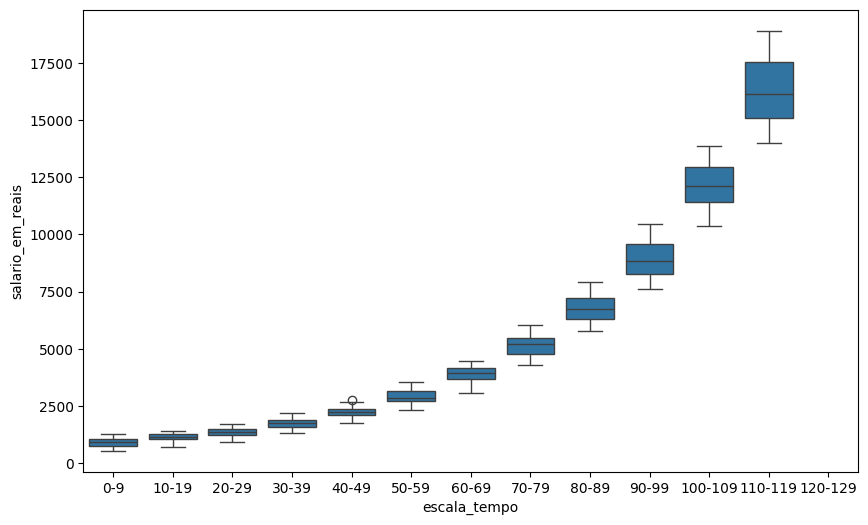

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinar modelo linear

In [61]:
# Importar Bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [62]:
# Criar o Dataset de Treino e Teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [63]:
# Split dos dados usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [64]:
kf.split(X)

<generator object _BaseKFold.split at 0x7420707f3520>

In [65]:
# Bloco para Treinamento do Modelo

# Criar o Pipeline
# Padronizar variaveis nnumericas = tempo_na_empresa e nivel_na_empresa

colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para Colunas Numéricas
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler())
])

# Criar o ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
  ('num', transformer_numericas, colunas_numericas)
])

# Criar o Modelo de Regressão Linear - Pipeline Principal
# Pré-processamento + Regressão Linear (treinamento)

model_regr = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

# Armazenar RMSE Treino e Teste

rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Treino e Teste
r2score_fold_test = []

# Armazenar Residuos
residuos = []

# Armazenar Predições
y_pred_total = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Treinar o Modelo
  model_regr.fit(X_train, y_train)

  # Predições
  y_train_pred = model_regr.predict(X_train)
  y_test_pred = model_regr.predict(X_test)

  # Calcular RSME, R2 e Residuos para conjunto de treino e teste

  # Calcular RMSE
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

  # Calcular R2
  r2score_test = r2_score(y_test, y_test_pred)

   # Calcule Residuos
  residuos_test = np.array(y_test - y_test_pred)

  # Armazenar RMSE
  rmse_scores_fold_train.append(rmse_train)
  rmse_scores_fold_test.append(rmse_test)

  # Armazenar R2
  r2score_fold_test.append(r2score_test)

  # Armazenar Residuos
  residuos.append(residuos_test)

  # Armazenar Predições
  y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)

percentual_rmse_final = ((rmse_test_final- rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1) 

### Analisando as métricas do modelo linear

In [81]:
# Métricas 
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Teste: {r2score_test_final}')
print(f'% Dif. Percentual RMSE Treino e Teste: {percentual_rmse_final}')

RMSE Treino: 53.32698559565159
RMSE Teste: 54.70504352796338
R2 Teste: 0.9998524123039415
% Dif. Percentual RMSE Treino e Teste: 2.584166190755325


### Análise de residuos - Modelo Linear

In [67]:
# Transformar residuos na escala padrão
# (X = media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

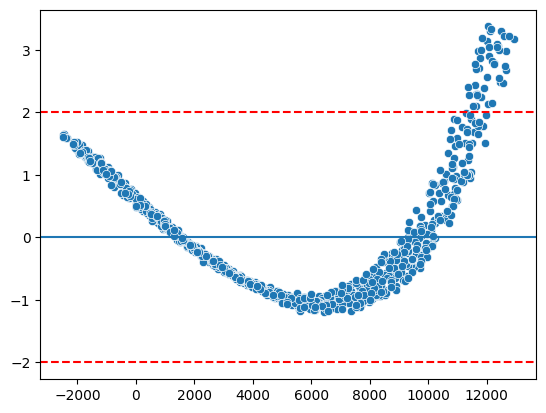

In [68]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 na escala padrão
# verificar graficamente a homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')

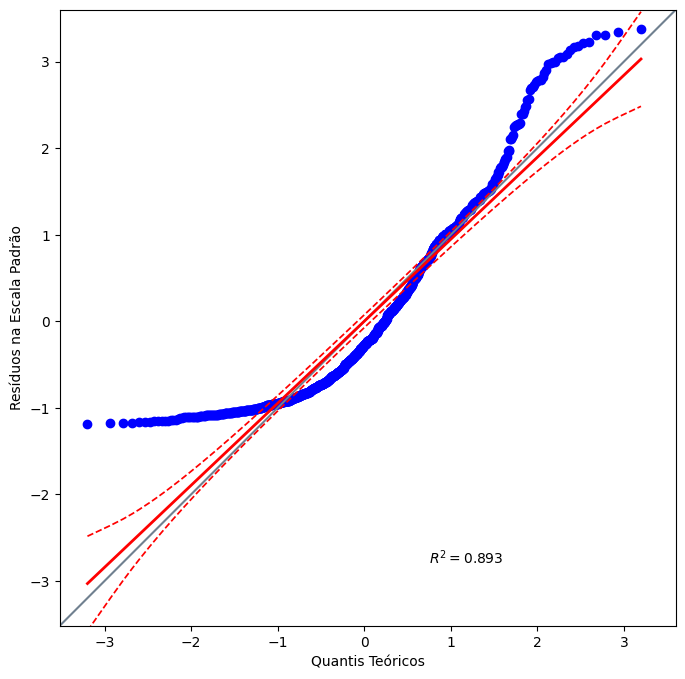

In [69]:
# checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(10, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()

In [70]:
# Teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste {stat_shapiro}, P-Value {p_value_shapiro}")

Estat. Teste 0.891969217965228, P-Value 7.013497918013492e-26


In [71]:
# teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stat_ks}, P-Value {p_value_ks}")

Estat. Teste 0.5939999999999955, P-Value 0.0


In [72]:
# Teste de normalidade - Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estat. Teste {stat_lilliefors}, P-Value {p_value_lilliefors}")

Estat. Teste 0.11825983774680088, P-Value 0.0009999999999998899


# Treinar modelo Polinomial

In [79]:
# Bloco para Treinamento do Modelo

#graus_polynomial = [1,2,3,4,5,6,7,8,9,10]
graus_polynomial = [4]


# Armazenar RMSE Treino e Teste
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split dos dados usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
  # Criar o Pipeline
  # Padronizar variaveis nnumericas = tempo_na_empresa e nivel_na_empresa

  colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

  # Transformer para Colunas Numéricas
  transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
  ])

  # Criar o ColumnTransformer
  preprocessor = ColumnTransformer(transformers=[
    ('num', transformer_numericas, colunas_numericas)
  ])

  # Criar Features polinomiais
  poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

  
  # Pré-processamento + treinamento

  model_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', poly_feat),
    ('regressor', LinearRegression())
  ])

  # Armazenar RMSE Treino e Teste

  rmse_scores_fold_train = []
  rmse_scores_fold_test = []

  # Armazenar R2 Treino e Teste
  r2score_fold_test = []

  # Armazenar Residuos
  residuos = []

  # Armazenar Predições
  y_pred_total = []

  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o Modelo
    model_poly.fit(X_train, y_train)

    # Predições
    y_train_pred = model_poly.predict(X_train)
    y_test_pred = model_poly.predict(X_test)

    # Calcular RSME, R2 e Residuos para conjunto de treino e teste

    # Calcular RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calcular R2
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenar RMSE
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    # Armazenar R2
    r2score_fold_test.append(r2score_test)
    # Armazenar Residuos
    residuos.append(residuos_test)
    # Armazenar Predições
    y_pred_total.append(y_test_pred)

  rmse_train_final = np.mean(rmse_scores_fold_train)
  rmse_test_final = np.mean(rmse_scores_fold_test)

  r2score_test_final = np.mean(r2score_fold_test)
  percentual_rmse_final = ((rmse_test_final- rmse_train_final) / rmse_train_final) * 100
  residuos = np.array(residuos).reshape(-1)
  y_pred_total = np.array(y_pred_total).reshape(-1) 

  rmse_test_values.append(rmse_test_final)
  rmse_train_values.append(rmse_train_final)
  r2score_test_values.append(r2score_test_final)
  percentual_rmse_values.append(percentual_rmse_final)

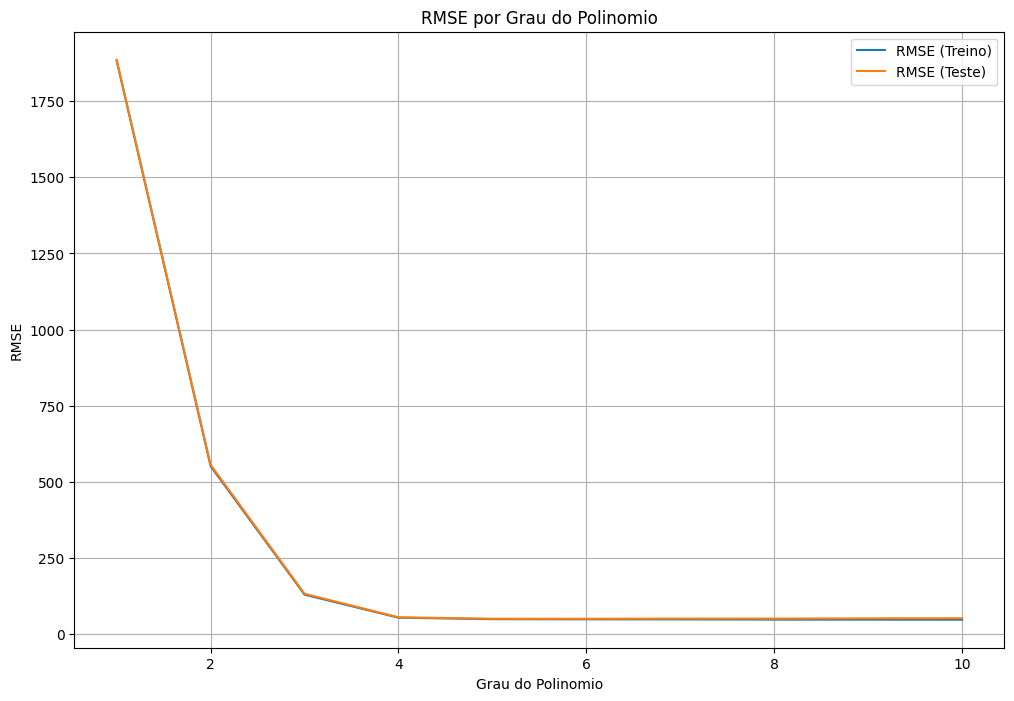

In [78]:
# Plotar Gráfico para comparar RMSE por Graus de Polinomio
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do Polinomio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau do Polinomio')
plt.legend()
plt.grid(True)
plt.show()

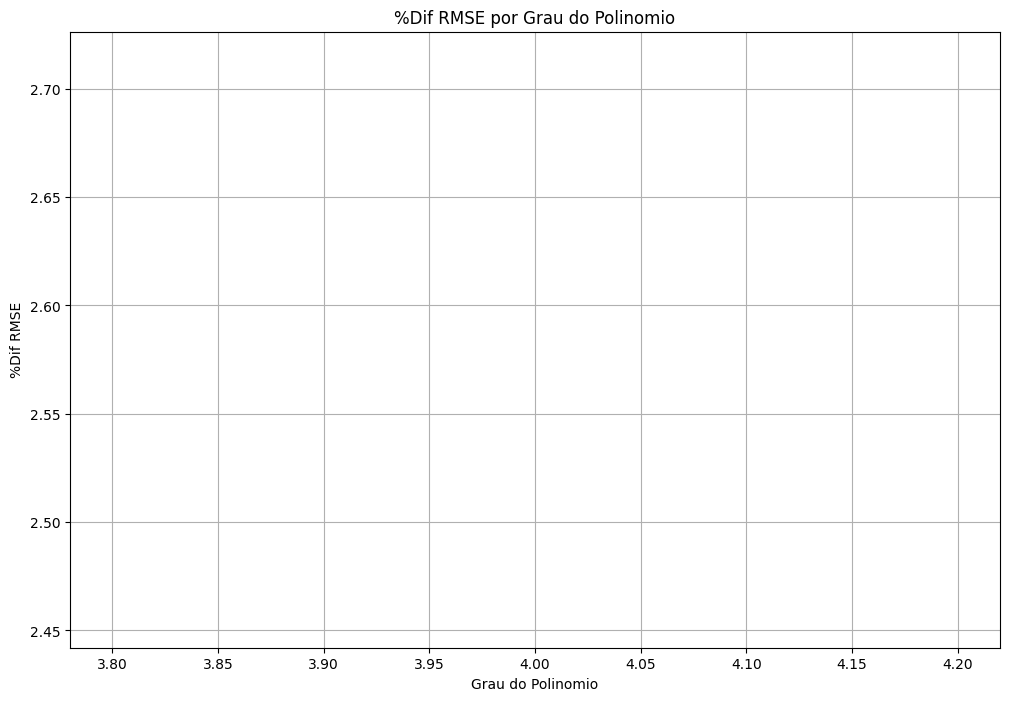

In [80]:
# Plotar Gráfico para comparar %Dif RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='%Dif RMSE (Treino e Teste)')
plt.xlabel('Grau do Polinomio')
plt.ylabel('%Dif RMSE')
plt.title('%Dif RMSE por Grau do Polinomio')
plt.grid(True)
plt.show()

### Analisando as métricas do modelo polinomial

In [82]:
# Métricas 
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'R2 Teste: {r2score_test_final}')
print(f'% Dif. Percentual RMSE Treino e Teste: {percentual_rmse_final}')

RMSE Treino: 53.32698559565159
RMSE Teste: 54.70504352796338
R2 Teste: 0.9998524123039415
% Dif. Percentual RMSE Treino e Teste: 2.584166190755325


### Análise de Resíduos - Modelo Polinomial

In [83]:
# Transformar residuos na escala padrão
# (X = media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

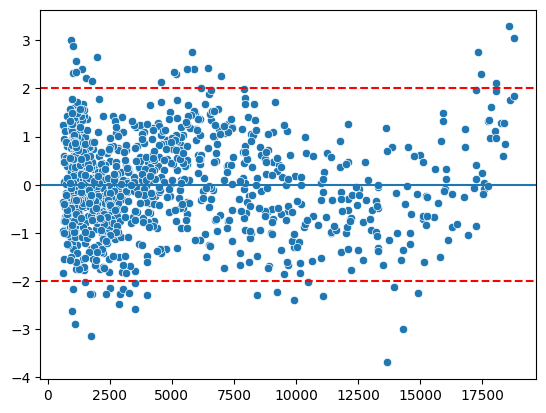

In [84]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 na escala padrão
# verificar graficamente a homocedasticidade: Valores em torno da reta sem nenhuma tendencia ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')


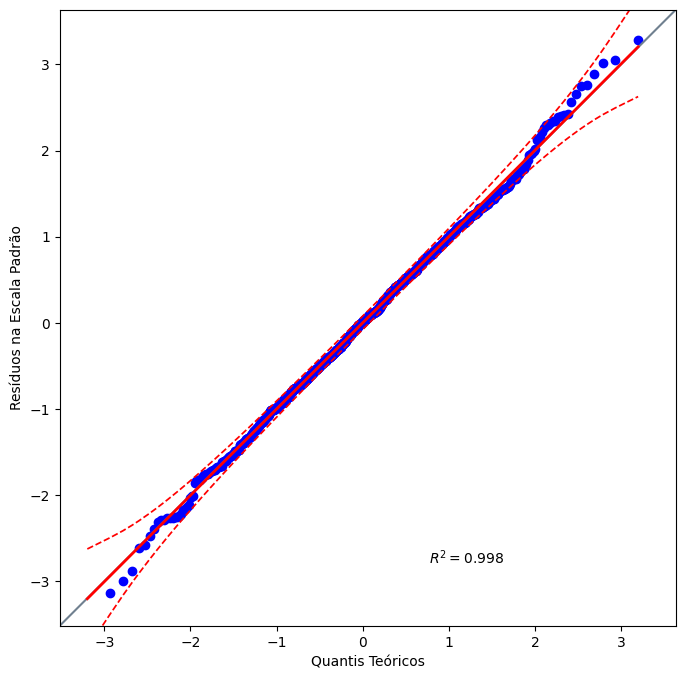

In [85]:
# checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(10, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()

In [86]:
# Teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estat. Teste {stat_shapiro}, P-Value {p_value_shapiro}")

Estat. Teste 0.9986951372205289, P-Value 0.6852797159638004


In [87]:
# Teste de normalidade - Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuos)
print(f"Estat. Teste {stat_lilliefors}, P-Value {p_value_lilliefors}")

Estat. Teste 0.013637346894973312, P-Value 0.956627002204744


In [88]:
# Teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estat. Teste {stat_ks}, P-Value {p_value_ks}")

Estat. Teste 0.4823744649953392, P-Value 1.2202460105710526e-214
